# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan dalam penelitian ini diperoleh dari Kaggle, Dataset yang digunakan dalam penelitian ini diperoleh dari Kaggle. Data ini mencakup berbagai fitur yang berkaitan dengan kondisi cuaca, seperti Temperature, Humidity, Wind Speed, Precipitation (%), Cloud Cover, Atmospheric Pressure, UV Index, Season, Visibility, Location, dan Weather Type.

Target klasifikasi pada dataset ini adalah Weather Type, yang mengelompokkan kondisi cuaca ke dalam empat kategori, yaitu Rainy, Sunny, Cloudy, dan Snowy. Dengan karakteristik tersebut, dataset ini sangat sesuai untuk praktik penerapan algoritma klasifikasi, analisis eksploratif data (EDA), serta evaluasi performa model machine learning.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import mlflow
import mlflow.sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats.mstats import winsorize
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("weather_classification_data.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Menampilkan 5 data teratas

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


menampilkan informasi datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


menampilkan deskripsi datasest numerik

In [5]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


menampilkan deistribusi data pada weather type

In [6]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

menampilkan data null

In [7]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

menampilkan data duplikat

In [8]:
df.duplicated().sum()

0

mengelompokan fitur umerik dan katagorikal

In [9]:
num_features = ['Temperature',	'Humidity',	'Wind Speed',	'Precipitation (%)',	'Atmospheric Pressure',	'UV Index',	'Visibility (km)']
cat_features = ['Cloud Cover', 'Season', 'Location']

Menampilkan hubungan antar datasets

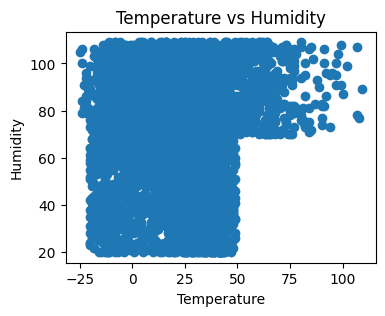

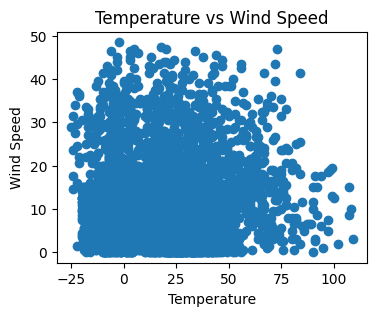

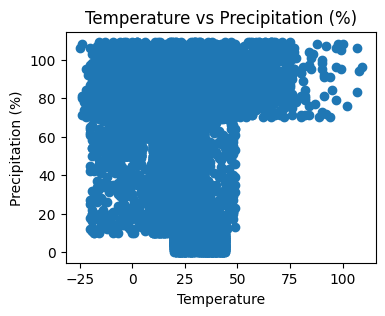

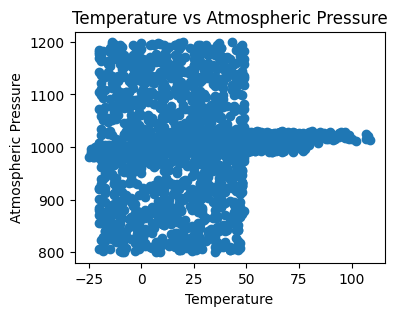

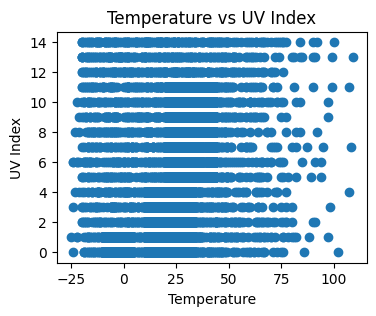

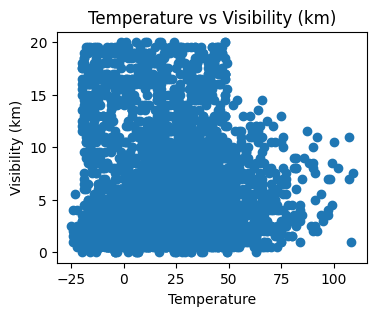

In [10]:
for col in num_features:
    if col != 'Temperature':
        plt.figure(figsize=(4, 3))
        plt.scatter(df['Temperature'], df[col])
        plt.xlabel('Temperature')
        plt.ylabel(col)
        plt.title(f'Temperature vs {col}')
        plt.show()

menampilkan hubungan natar fitur menggunakan heatmap

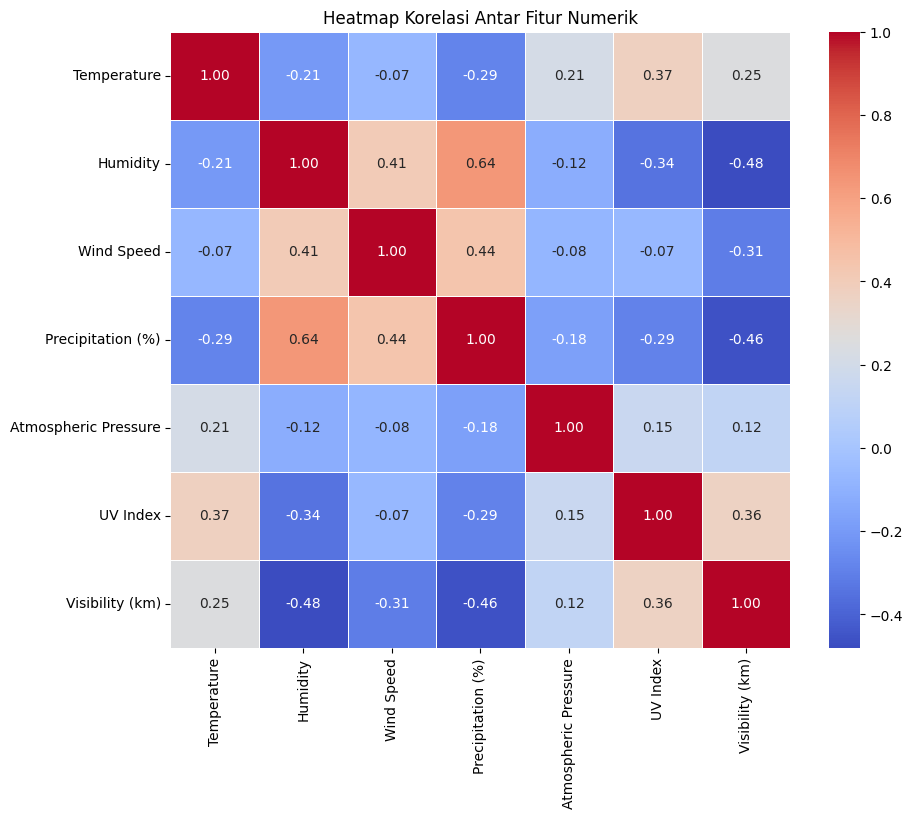

In [11]:
corr_matrix = df[num_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

menampilkan data outler menggunakan boxplot

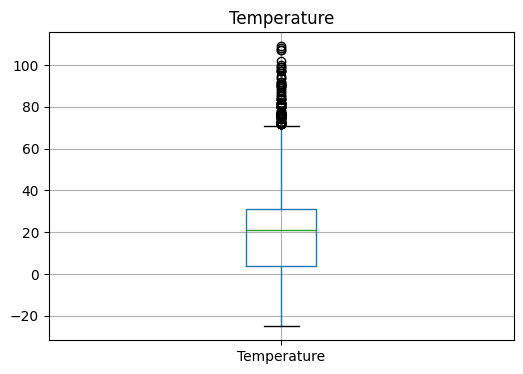

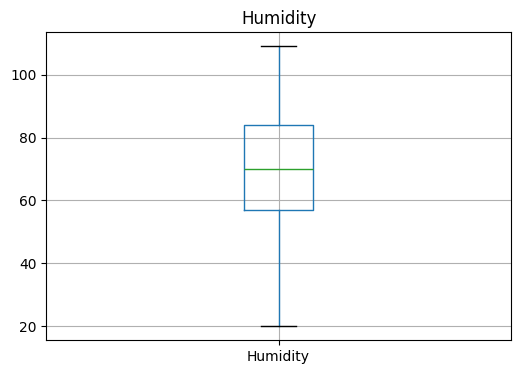

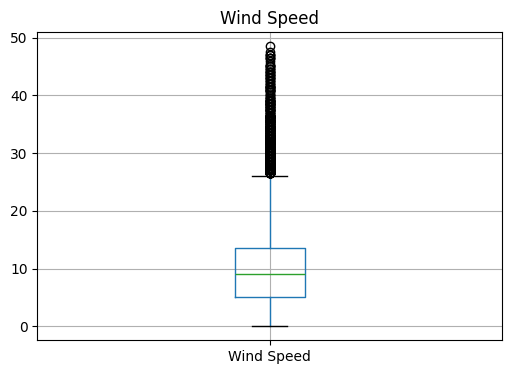

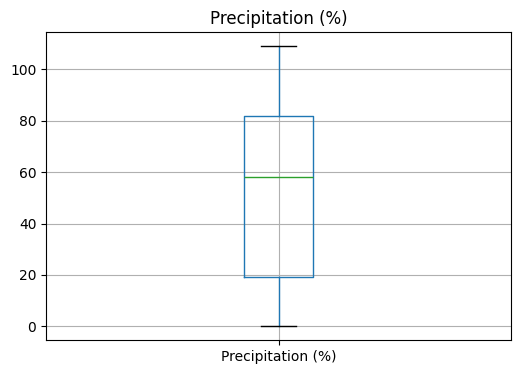

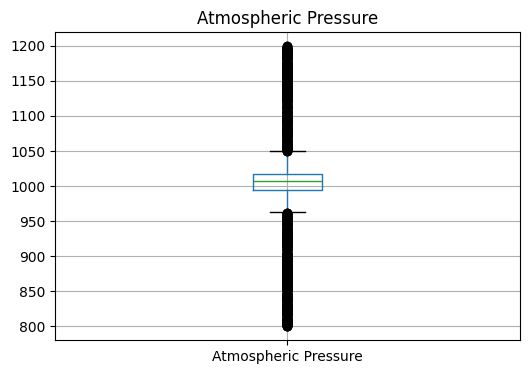

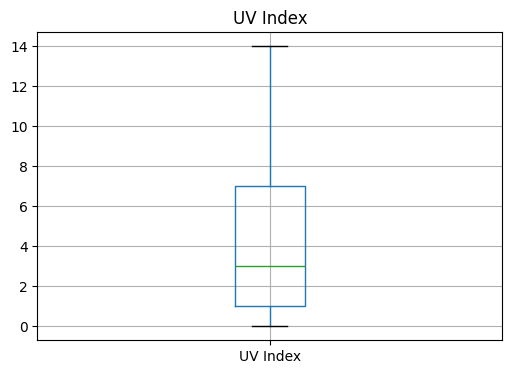

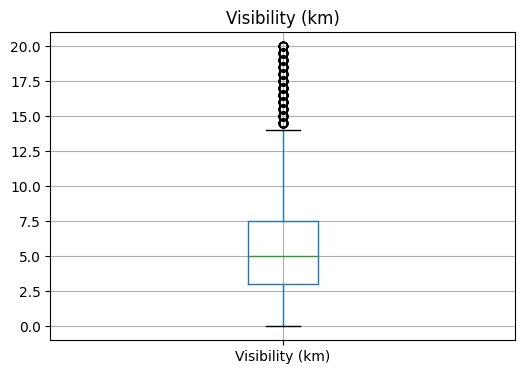

In [12]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

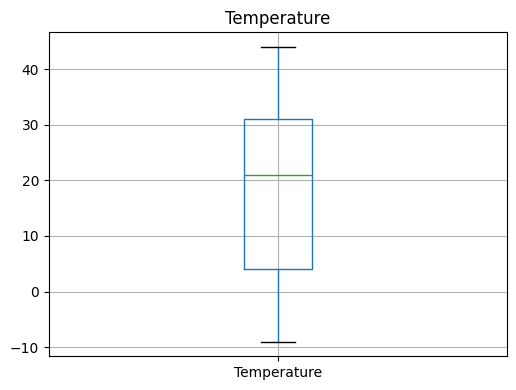

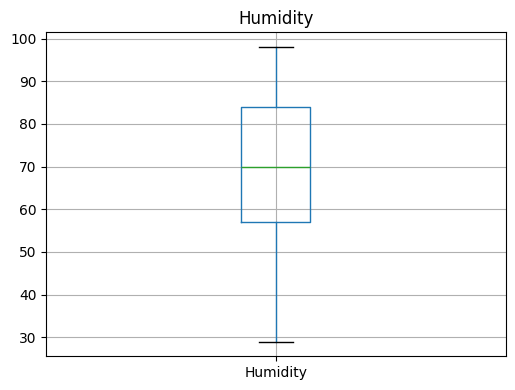

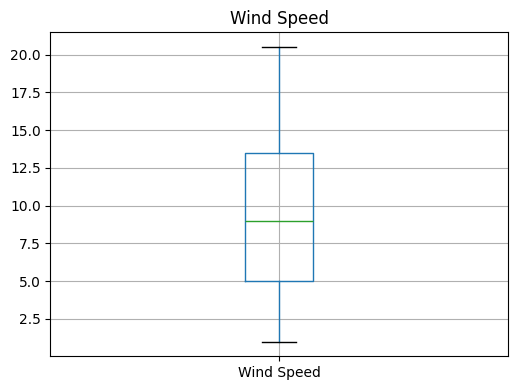

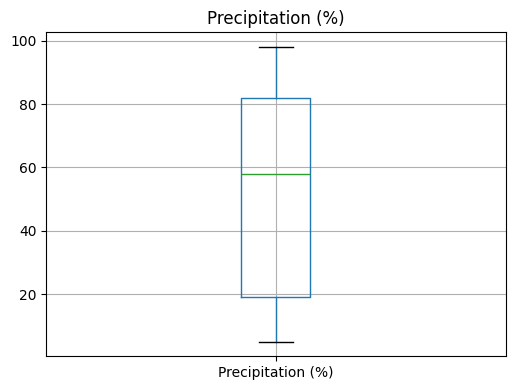

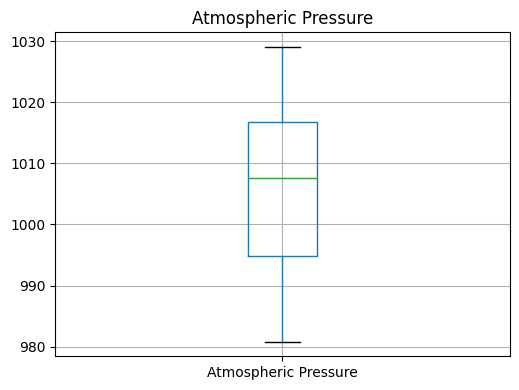

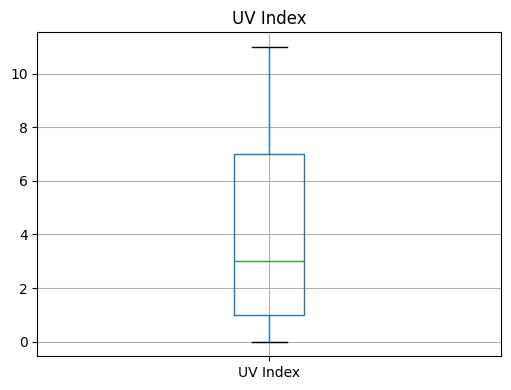

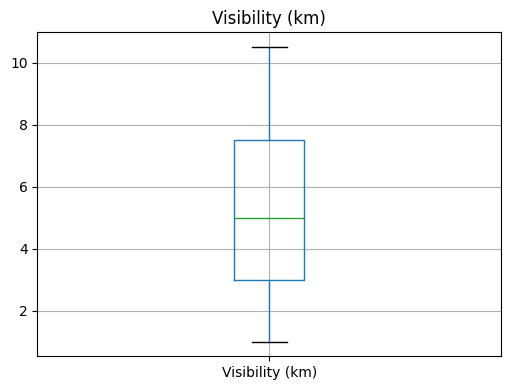

In [13]:
df_winsorized = df.copy()

for col in num_features:
    df_winsorized[col] = winsorize(df[col], limits=(0.05, 0.05))


for col in num_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 2)
    df_winsorized.boxplot(column=col)
    plt.title(col)

    plt.tight_layout()
    plt.show()

In [14]:
df[num_features] = df_winsorized[num_features]

In [15]:
X = df.drop(columns="Weather Type")
y = df["Weather Type"]

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [17]:
scaler_standard = StandardScaler()
df[num_features] = scaler_standard.fit_transform(df[num_features])

In [18]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [19]:
output_dir = "data_preprocessed"
os.makedirs(output_dir, exist_ok=True)

In [20]:
df.to_csv('preprocessed.csv', index=False)

In [21]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.297861,0.222979,0.013259,0.906329,3,0.344106,-0.523587,3,-0.633377,1,1
1,1.302996,1.417006,-0.163444,0.555805,3,0.387892,0.844997,1,1.723248,1,0
2,0.726687,-0.244248,-0.428499,-1.196816,0,0.911168,0.297563,1,0.091738,2,3
3,1.238961,0.742121,-1.400366,0.906329,0,1.451671,0.844997,1,-1.539772,0,3
4,0.534584,0.274894,1.338533,0.396476,2,-1.102259,-0.797304,3,-0.995935,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.553998,0.274894,0.896775,0.555805,2,-0.206446,-0.797304,2,-1.539772,2,1
13196,-1.258375,0.378722,-1.046960,-0.973755,1,1.651937,-0.797304,3,0.273017,0,2
13197,0.726687,0.430636,-0.693553,-0.814426,2,0.478335,-0.249870,0,1.360690,0,0
13198,-1.002238,0.378722,0.101611,1.288719,2,-1.561651,-1.071021,3,-1.177214,1,2
